In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import gradio as gr
import warnings
warnings.filterwarnings('ignore')
print("Bibliotecas carregadas!")

Bibliotecas carregadas!


In [2]:
df = pd.read_csv("data/IMDB Dataset.csv")
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: title={'center': 'Distribuição de Sentimentos'}, xlabel='sentiment'>

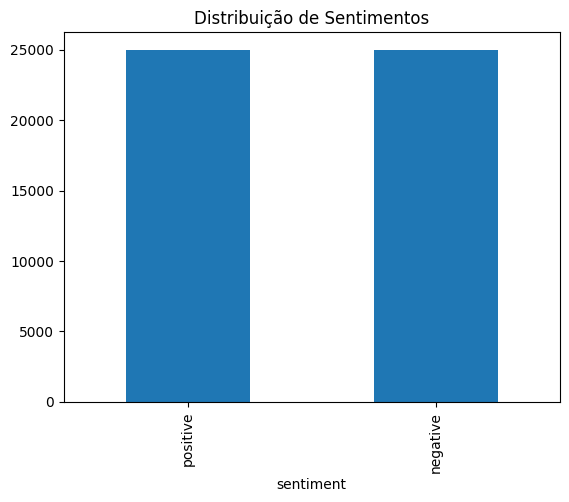

In [3]:
df['sentiment'].value_counts().plot(kind='bar', title='Distribuição de Sentimentos')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])
print(f"Treino: {len(X_train)}, Teste: {len(X_test)}")

Treino: 40000, Teste: 10000


In [6]:
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

# CORREÇÃO AQUI: usar round() como função, não como método
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.4f} → {acuracia*100:.2f}%")

print("\nRelatório completo:")
print(classification_report(y_test, y_pred))

Acurácia: 0.8898 → 88.98%

Relatório completo:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [7]:
def prever_sentimento(texto):
    vec = vectorizer.transform([texto])
    prob = model.predict_proba(vec)[0]
    if model.predict(vec)[0] == 'positive':
        return f"POSITIVA – {prob[1]:.1%} de confiança"
    else:
        return f"NEGATIVA – {prob[0]:.1%} de confiança"

demo = gr.Interface(
    fn=prever_sentimento,
    inputs=gr.Textbox(lines=5, placeholder="Digite aqui a crítica do filme..."),
    outputs="text",
    title="Classificação de Sentimentos – IMDb 50k",
    description="Modelo baseline TF-IDF + Regressão Logística",
    examples=[
        ["This movie was absolutely fantastic! I loved every minute."],
        ["Terrible film. Waste of time and money."]
    ]
)
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
